In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
data_path = '../../data/postprocessed/PC/'

mapping_table = {
    'NN50PercLeNet5': 'LeNet5',
    'NN50Percmnasnet05': 'MnasNet',
    'NN50Percmobilenetv2': 'MobileNetV2',
    'NN50Percresnet18': 'ResNet18',
    'gpuburn5min': 'GPU-burn'
}

data_sheet = pd.DataFrame()
for csv_name in [file for file in os.listdir(data_path) if (file.endswith('_telemetry.csv') and ('NN50Perc' in file or '5min' in file))]:
    csv_full_path = os.path.join(data_path, csv_name)
    print(csv_full_path)
    df = pd.read_csv(csv_full_path)
    df['Index'] = range(len(df))
    df['progress'] = df['Index'].transform(
        lambda x: 100 * (x - x.min()) / (x.max() - x.min()) if x.max() > x.min() else 0)
    df['Range'] = int(csv_name.split('_')[1].split('_')[0])
    df['App_name'] = mapping_table[csv_name.split('_')[0]]

    data_sheet=pd.concat([data_sheet, df], ignore_index=True)

../../data/postprocessed/PC/NN50Percmobilenetv2_1_telemetry.csv
../../data/postprocessed/PC/NN50Percresnet18_1_telemetry.csv
../../data/postprocessed/PC/gpuburn5min_1_telemetry.csv
../../data/postprocessed/PC/NN50Percmnasnet05_1_telemetry.csv


In [3]:
data_sheet.columns

Index(['timestamp_ns', 'gpu_index', 'name', 'temperature_C',
       'util_gpu_percent', 'util_mem_percent', 'mem_total_MB', 'mem_used_MB',
       'mem_free_MB', 'clock_sm_MHz', 'clock_mem_MHz', 'clock_graphics_MHz',
       'fan_speed_percent', 'power_draw_W', 'ecc_volatile_corrected',
       'ecc_volatile_uncorrected', 'ecc_aggregate_corrected',
       'ecc_aggregate_uncorrected', 'Index', 'progress', 'Range', 'App_name'],
      dtype='object')

### Drop meaningless columns

In [4]:
data_sheet.describe()

,gpu_index,temperature_C,util_gpu_percent,util_mem_percent,mem_total_MB,mem_used_MB,mem_free_MB,clock_sm_MHz,clock_mem_MHz,clock_graphics_MHz,fan_speed_percent,power_draw_W,ecc_volatile_corrected,ecc_volatile_uncorrected,ecc_aggregate_corrected,ecc_aggregate_uncorrected,Index,progress,Range
count,1748.0,1748.000000,1748.000000,1748.000000,1748.0,1748.000000,1748.000000,1748.000000,1748.000000,1748.000000,1748.0,1748.000000,1748.0,1748.0,1748.0,1748.0,1748.000000,1748.000000,1748.0
mean,0.0,64.910183,83.080664,33.307208,8188.0,6033.550343,2154.449085,1489.652746,7312.551487,1489.652746,-1.0,31.341384,-1.0,-1.0,-1.0,-1.0,222.034897,50.000000,1.0
std,0.0,4.528792,18.175788,10.943525,0.0,1950.257894,1950.256227,494.722843,1262.426367,494.722843,0.0,4.341864,0.0,0.0,0.0,0.0,132.313800,28.941931,0.0
min,0.0,43.000000,0.000000,0.000000,8188.0,353.000000,255.000000,35.000000,405.000000,35.000000,-1.0,4.057000,-1.0,-1.0,-1.0,-1.0,0.000000,0.000000,1.0
25%,0.0,63.000000,79.000000,31.000000,8188.0,4164.500000,415.000000,1140.000000,7000.000000,1140.000000,-1.0,31.463000,-1.0,-1.0,-1.0,-1.0,109.000000,24.986443,1.0
50%,0.0,67.000000,88.000000,34.000000,8188.0,7215.000000,973.000000,1500.000000,8000.000000,1500.000000,-1.0,32.009500,-1.0,-1.0,-1.0,-1.0,218.000000,50.000000,1.0
75%,0.0,68.000000,91.000000,40.000000,8188.0,7773.000000,4023.500000,2025.000000,8000.000000,2025.000000,-1.0,32.531250,-1.0,-1.0,-1.0,-1.0,327.000000,75.013557,1.0
max,0.0,72.000000,100.000000,65.000000,8188.0,7933.000000,7835.000000,2040.000000,8000.000000,2040.000000,-1.0,38.757000,-1.0,-1.0,-1.0,-1.0,488.000000,100.000000,1.0


In [5]:
metrics_map = {
    'temperature_C':'Temperature [°C]',
    'util_gpu_percent': 'GPU Utilization [%]',
    'util_mem_percent':'GPU Memory Utilization [%]',
    'mem_used_MB':'Used Memory [MB]', 
    'mem_free_MB':'Free Memory [MB]', 
    'clock_sm_MHz':'Streaming Multiprocessor Clock Frequency [MHz]', 
    'clock_mem_MHz':'Memory Clock Frequency [MHz]', 
    'power_draw_W':'GPU Power Consumption [W]'
}
data_sheet.rename(columns=metrics_map, inplace=True)
# data_sheet['timestamp_s'] = data_sheet['timestamp_ns'] / 1e9

In [6]:
data_sheet.drop(labels=['ecc_volatile_uncorrected', 'ecc_volatile_uncorrected', 'ecc_aggregate_corrected', 'ecc_aggregate_uncorrected', 'fan_speed_percent'], axis=1, inplace=True)

In [7]:
# hue_order = ['Backpropagation algorithm', 'Gaussian Elimination', 'Lenet5', 'GPU-burn']
def plot_gpu_metric(df, column_name):
    print(df['App_name'].unique())
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.lineplot(data=df, x='Index', y=column_name, ax=ax, hue='App_name')
    ax.set_title(f'{column_name} over time', fontsize=14)
    ax.set_xlabel('Time (s)', fontsize=12)
    ax.set_ylabel(column_name, fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend()
    # ax.set_xlim(right=5000)
    plt.show()

['MobileNetV2' 'ResNet18' 'GPU-burn' 'MnasNet']


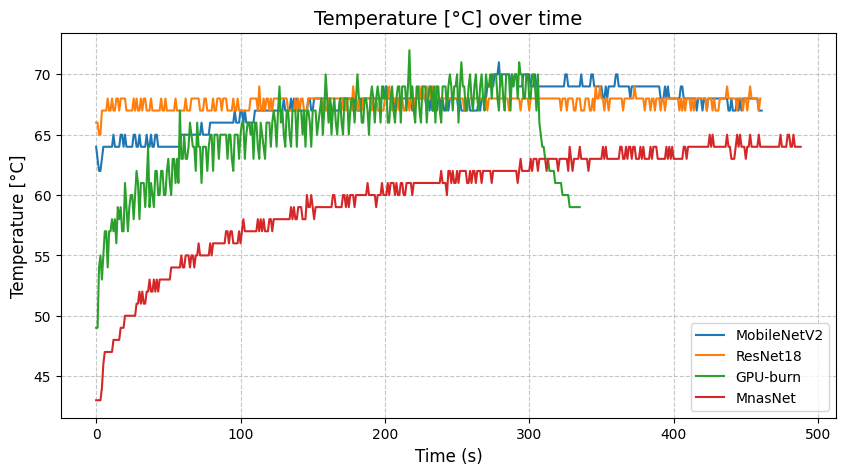

['MobileNetV2' 'ResNet18' 'GPU-burn' 'MnasNet']


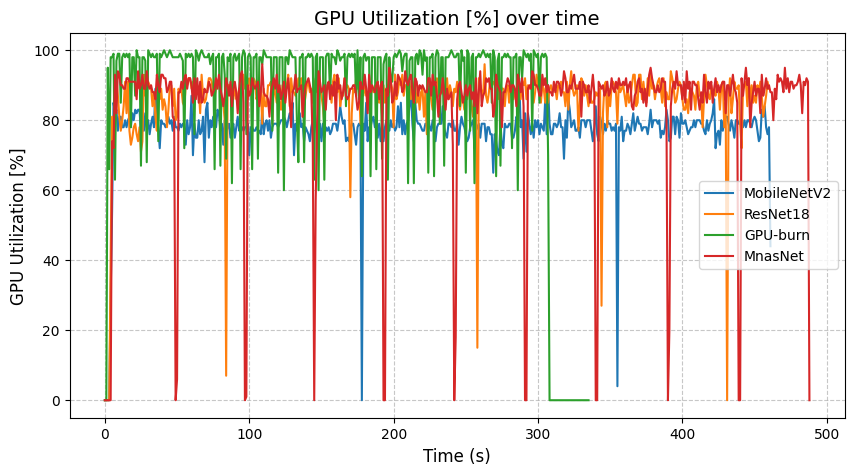

['MobileNetV2' 'ResNet18' 'GPU-burn' 'MnasNet']


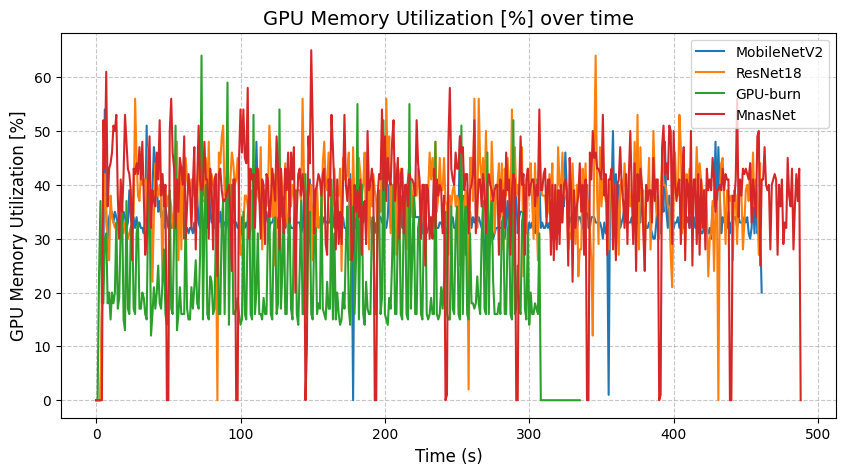

['MobileNetV2' 'ResNet18' 'GPU-burn' 'MnasNet']


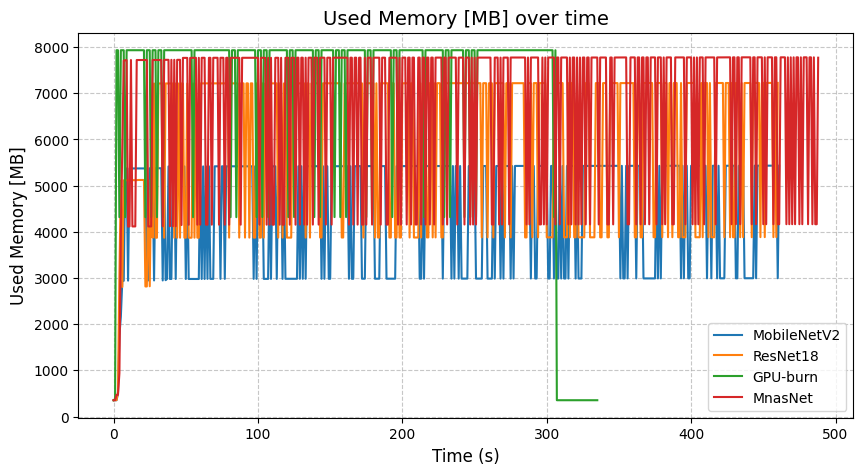

['MobileNetV2' 'ResNet18' 'GPU-burn' 'MnasNet']


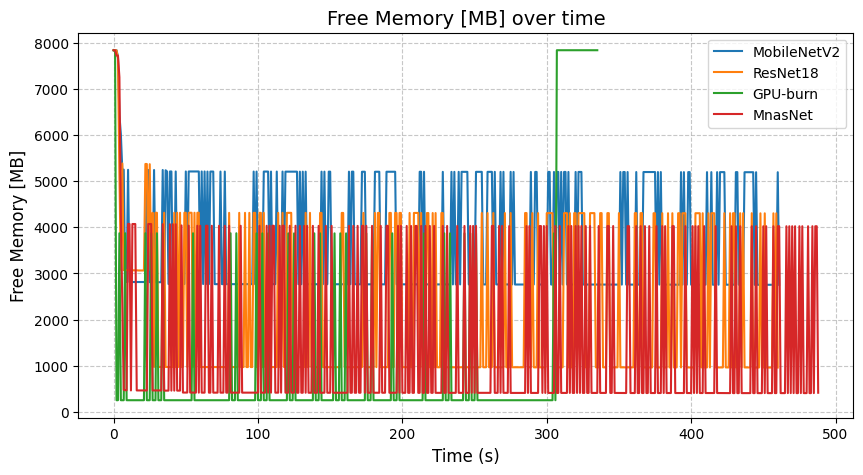

['MobileNetV2' 'ResNet18' 'GPU-burn' 'MnasNet']


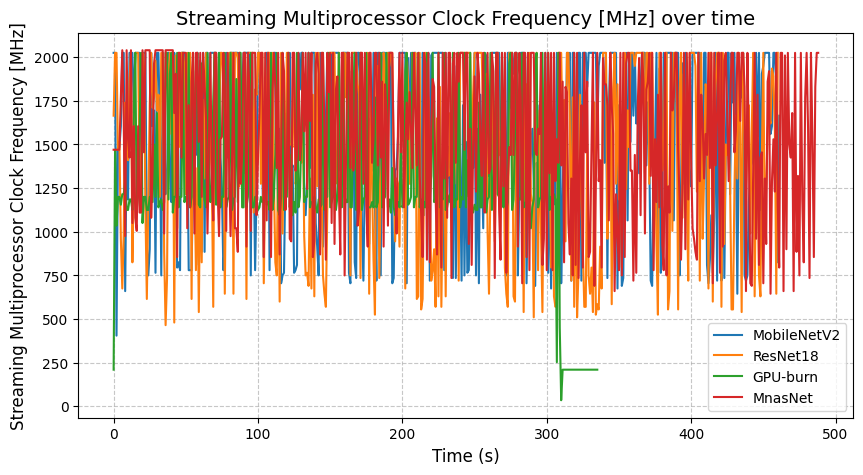

['MobileNetV2' 'ResNet18' 'GPU-burn' 'MnasNet']


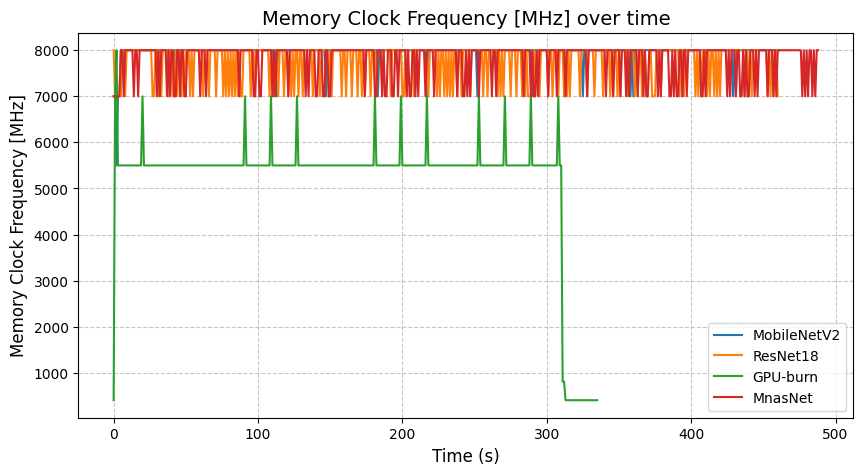

['MobileNetV2' 'ResNet18' 'GPU-burn' 'MnasNet']


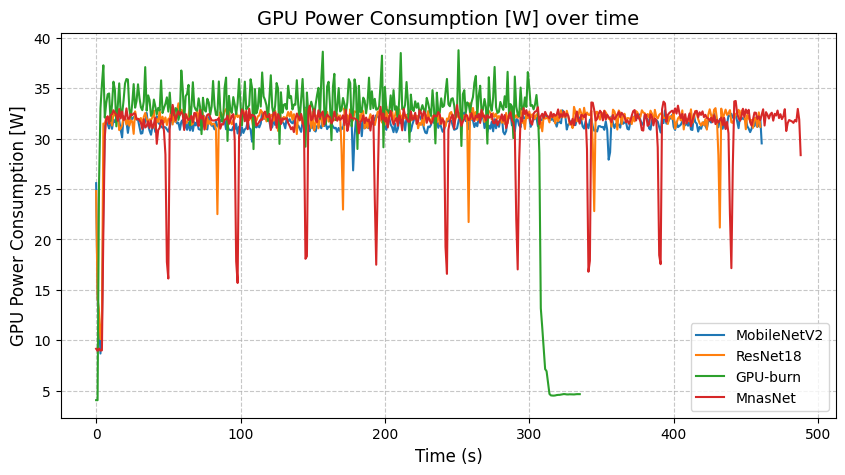

In [8]:
for column in metrics_map.values():
    plot_gpu_metric(data_sheet, column)

### To me it seems that the application is run at maximum 7 times to satisfy experimental conditions

In [83]:
# hue_order = ['Backpropagation algorithm', 'Gaussian Elimination', 'Lenet5', 'GPU-burn']
def plot_gpu_metric(df, range_lab):
    data = df[df['Range']==range_lab]
    # data['timestamp_s'] = data['timestamp_ns'] / 1e9
    # data['timestamp_s'] = data.groupby('App_name')['timestamp_s'].diff()
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.lineplot(data=data, x='timestamp_s', y='Temperature [°C]', ax=ax, hue='App_name')
    ax.set_title(f'Temperature [°C] over time for range = {range_lab}', fontsize=14)
    ax.set_xlabel('Time (s)', fontsize=12)
    ax.set_ylabel('Temperature [°C]', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend()
    # ax.set_xlim(right=5000)
    plt.show()

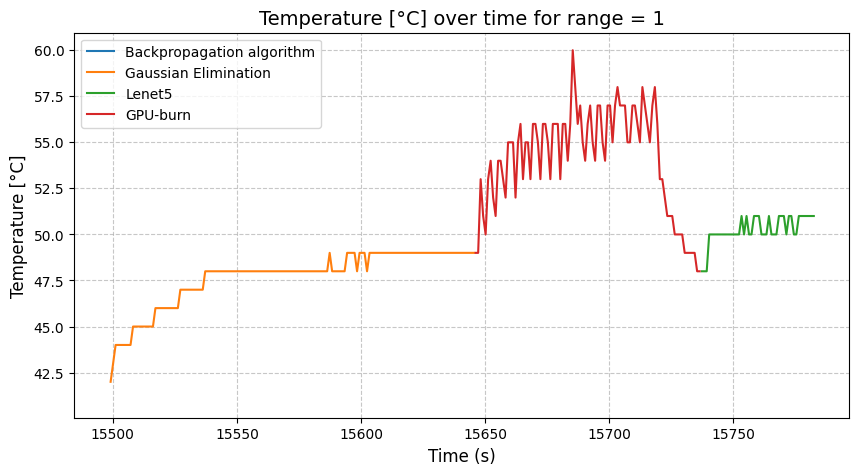

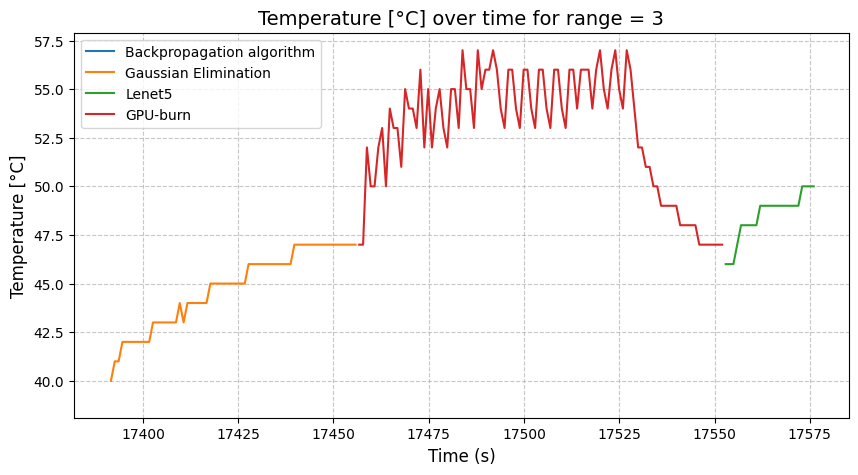

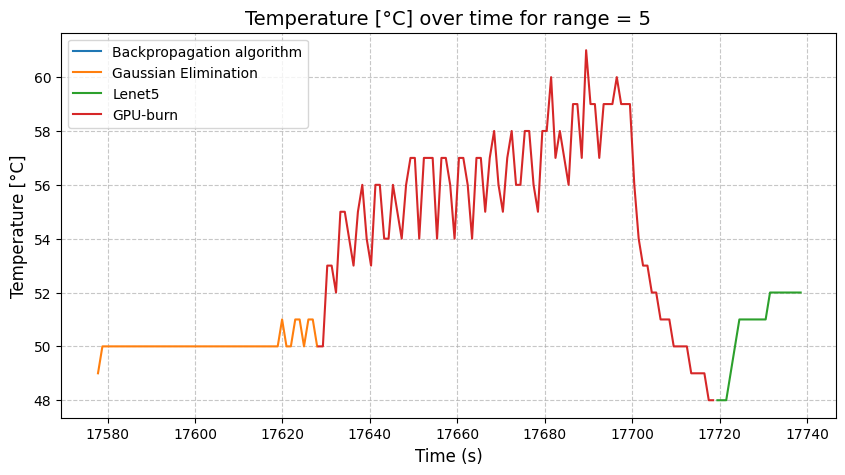

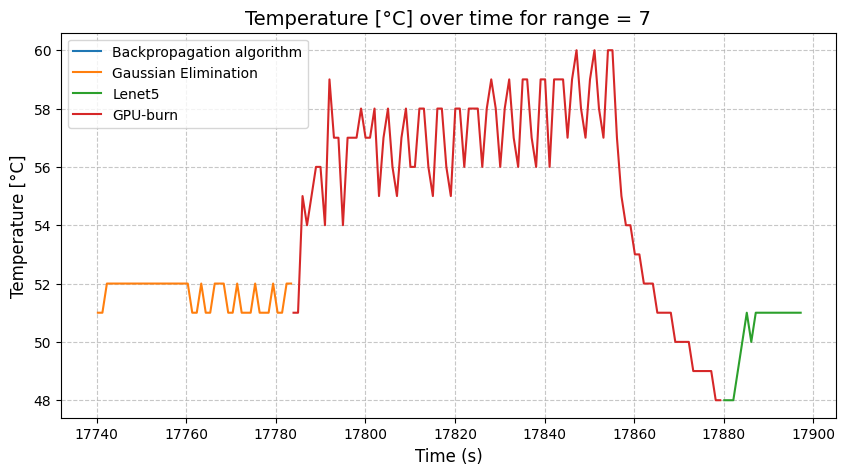

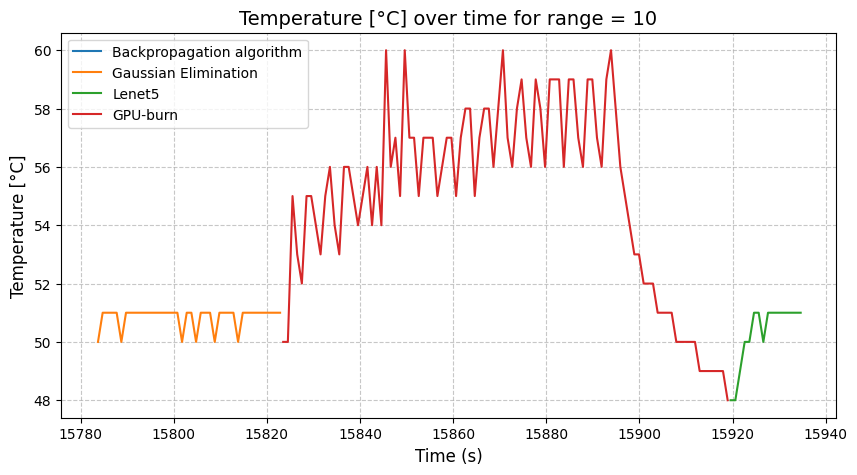

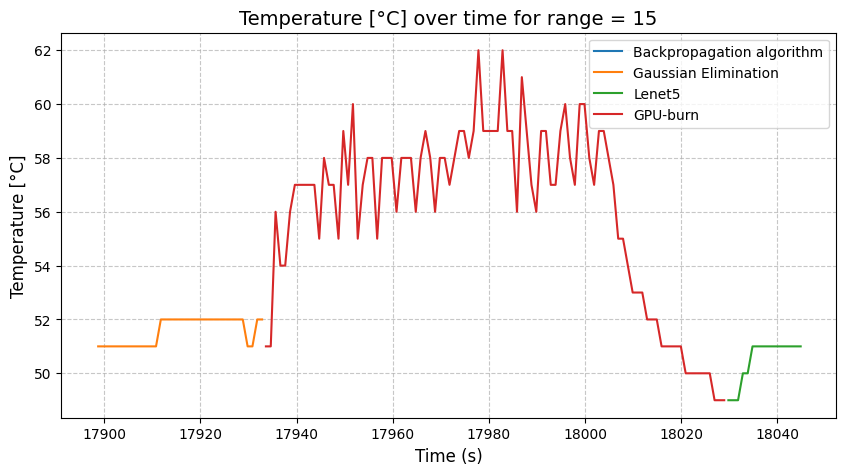

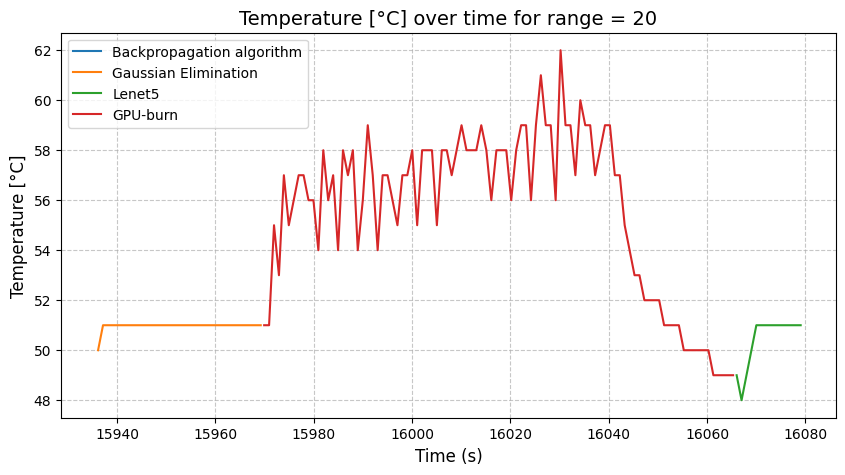

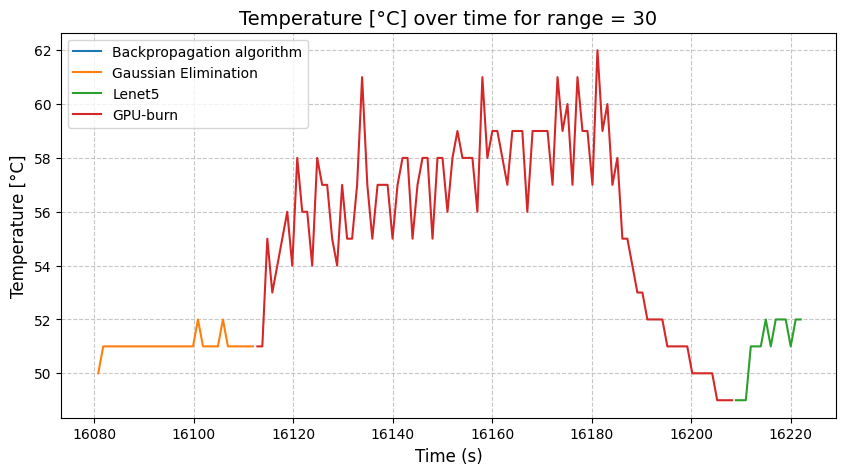

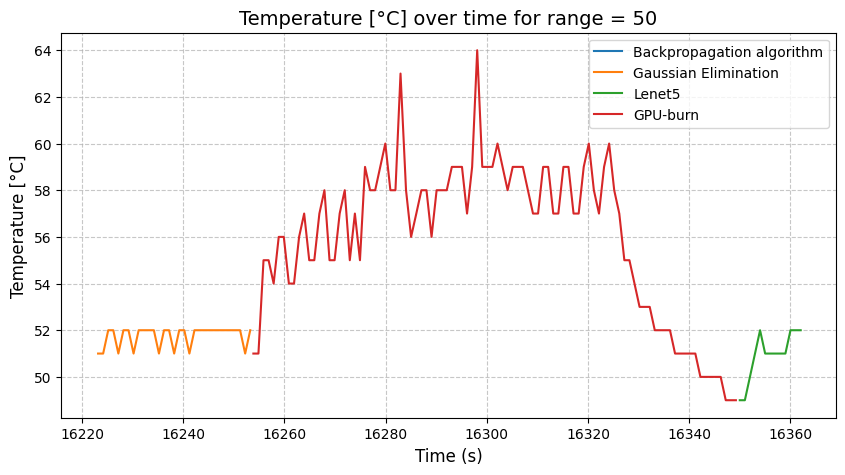

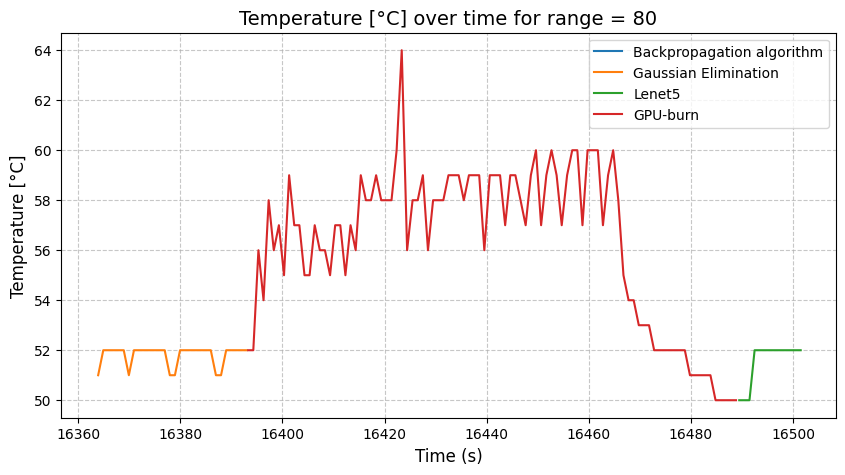

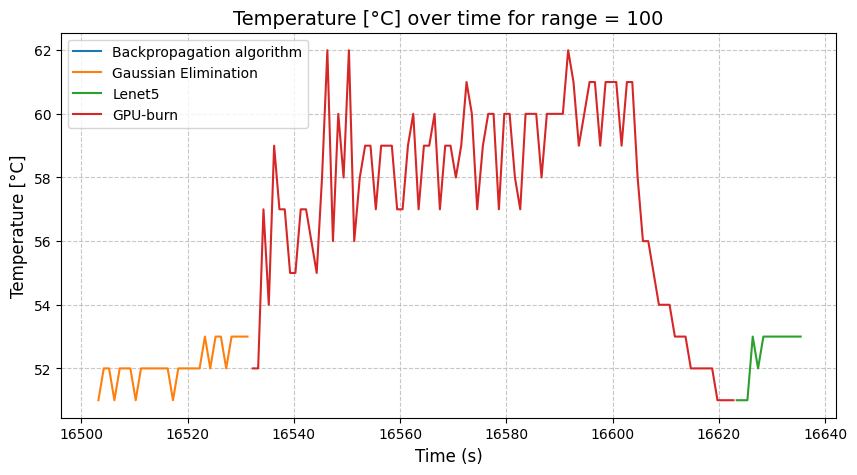

In [84]:
for range_lab in sorted(data_sheet['Range'].unique()):
    plot_gpu_metric(data_sheet, range_lab)